# Get Datasets

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [10]:
# print shape of the data
X, y = mnist['data'], mnist['target']

print("X shape = ", X.shape)
print("y shape = ", y.shape)

X shape =  (70000, 784)
y shape =  (70000,)


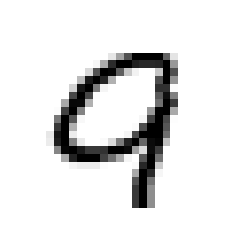

answer =  9


In [12]:
# Test Example
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

test=X[3000]
test_data = test.reshape(28, 28)
test_target=y[3000]

# Draw test digit
plt.imshow(test_data, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

# print target data
print("answer = ",test_target)

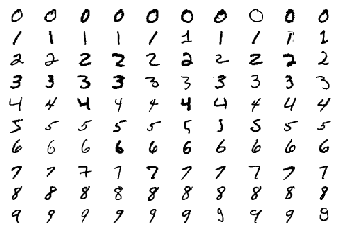

In [31]:
# print some mnist data samples
import numpy as np

fig = plt.figure()

for i in range(10):
    for j in range(10):
        idx = np.argwhere(y == str(i))[j]
        img = np.reshape(X[idx], (28, 28))
        plot = fig.add_subplot(10, 10, i*10 + j + 1)
        plot.imshow(img, cmap='binary', interpolation='nearest')
        plot.axis('off')

## Test Set Separation

In [32]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# shuffle training set for accuracy
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Binary Classifier

In [36]:
y_train_5 = (y_train == str(5))
y_test_5 = (y_test == str(5))

In [37]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [44]:
# test sample
X_test[0].shape
sgd_clf.predict(X_test)

array([False, False, False, ..., False,  True, False])

In [46]:
# Validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.95635, 0.965  , 0.9581 ])

### Confusion Matrix

In [48]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [51]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53603,   976],
       [ 1435,  3986]])

#### Precision & Recall

In [53]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


## Multinomial Classifier

In [63]:
# using SGD Classifier
sgd_clf.fit(X_train, y_train)
sgd_clf.predict(X_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array(['7', '2', '1', ..., '4', '5', '6'], dtype='<U1')

In [67]:
scores = sgd_clf.decision_function(X_test)

In [68]:
print(scores[0])
print(y_test[0])

[-369316.8213075  -940353.30055344 -284859.56459602 -190271.50406049
 -577712.35052752 -392132.35361837 -690544.06069954  397121.21672949
 -504548.19373198 -304853.31292259]
7


In [69]:
np.argmax(scores[0])

7

In [70]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [72]:
# Cross validation
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.84408118, 0.85889294, 0.85737861])

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.91046791, 0.90944547, 0.9086863 ])

## Error Control

In [74]:
# confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [75]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [76]:
conf_mx

array([[5730,    2,   20,   11,    9,   53,   47,   10,   36,    5],
       [   2, 6500,   44,   31,    6,   39,    6,    6,   95,   13],
       [  53,   33, 5361,  100,   80,   22,   91,   50,  154,   14],
       [  52,   40,  145, 5338,    2,  240,   35,   53,  132,   94],
       [  21,   28,   40,    8, 5346,    8,   55,   24,   90,  222],
       [  76,   46,   38,  186,   70, 4589,  105,   25,  186,  100],
       [  34,   21,   56,    2,   38,   85, 5631,    6,   44,    1],
       [  25,   24,   71,   30,   55,   13,    8, 5784,   13,  242],
       [  55,  167,   82,  159,   11,  151,   57,   23, 5002,  144],
       [  40,   34,   28,   90,  154,   37,    3,  182,   90, 5291]])